In [1]:
import requests
import pandas as pd
import numpy as np
import ast
import re

Set up the dictionary for code on different variablesto get data from Census

In [2]:
codes_2009 = {
    'Pop': 'B01003_001E',
    'Females': 'B01001_026E',
    'Median_Age': 'B01002_001E',
    'Veterans': 'B21001_002E',
    'White_People': 'B02001_002E',
    'Afr_Am_People': 'B02001_003E',
    'Asian': 'B02001_005E',
    'American_Ind_Alk_Ntv': 'B02001_004E',
    'Cuban_Origin': 'B03001_006E',
    'Puerto_Rican_Origin':'B03001_005E',
    'Dominican_Origin':'B03001_007E',
    'Mexican_Origin': 'B03001_004E',
    'Native_US':'B05001_002E',
    'Foreign_Born': 'B05012_003E',
    'Children': 'B09001_001E',
    'Married_Households': 'B11001_003E',
    'Less_Highschool': 'B06009_002E',
    'Bachelor_Holders': 'B06009_005E',
    'Labor_Force_Eligible': 'B10058_002E',      
    'Unemployed': 'B23001_001E',   
    'Median_Household_Income': 'B19013_001E',
    'Median_Income': 'B06011_001E',
    'Below_Poverty_Level_LTM': 'B17001_002E',
    'Wealthy_Households': 'B19001_017E', #Earns $200k or more
    'Gini_Index': 'B19083_001E',
    'Median_Age_Of_Worker': 'B23013_001E',
    'Workers': 'B24021_001E',
    'Working_Agricult': 'B24021_002E',
    'Working_Construction': 'B24021_005E',
    'Working_Manufacturing': 'B24021_006E',
    'Working_Retail': 'B24021_008E',
    'Working_Transportation': 'B24021_009E',
    'Working_Finance': 'B24021_013E',
    'Working_Education': 'B24021_021E',
    'Working_Health': 'B24021_022E',
    'Working_Food': 'B24021_025E',
    'Working_Public_Admin': 'B24021_027E',
    'Working_Information': 'B24021_012E',
    'Median_Gross_Rent': 'B25021_001E'
    ''
}






# create column names for 2011 American Community Survey's code
codes_2011 = {
    'Pop': 'B01003_001E',
    'Females': 'B01001_026E',
    'Median_Age': 'B01002_001E',
    'Veterans': 'B21001_002E',
    'White_People': 'B02001_002E',
    'Afr_Am_People': 'B02001_003E',
    'Asian': 'B02001_005E',
    'American_Ind_Alk_Ntv': 'B02001_004E',
    'Cuban_Origin': 'C03001_006E',
    'Puerto_Rican_Origin':'C03001_005E',
    'Dominican_Origin':'C03001_007E',
    'Mexican_Origin': 'C03001_004E',
    'Native_US':'B05001_002E',
    'Foreign_Born': 'B05012_003E',
    'Children': 'B09001_001E',
    'Married_Households': 'B11001_003E',
    'Less_Highschool': 'B06009_002E',
    'Bachelor_Holders': 'B06009_005E',
    'Labor_Force_Eligible': 'B23025_003E',      #code changed in 2015
    'Unemployed': 'B23025_005E',   
    'Median_Household_Income': 'B19013_001E',
    'Median_Income': 'B06011_001E',
    'Below_Poverty_Level_LTM': 'B17001_002E',
    'Wealthy_Households': 'B19001_017E', #Earns $200k or more
    'Gini_Index': 'B19083_001E',
    'Median_Age_Of_Worker': 'B23013_001E',
    'Workers': 'B24050_001E',
    'Working_Agricult': 'B24050_002E',
    'Working_Construction': 'B24050_005E',
    'Working_Manufacturing': 'B24050_006E',
    'Working_Retail': 'B24050_008E',
    'Working_Transportation': 'B24050_009E',
    'Working_Finance': 'B24050_013E',
    'Working_Education': 'B24050_021E',
    'Working_Health': 'B24050_022E',
    'Working_Food': 'B24050_025E',
    'Working_Public_Admin': 'B24050_027E',
    'Working_Information': 'B24050_012E',
    'Median_Gross_Rent': 'B25064_001E'
    ''
}
# we need to double check this code through the follwing 
# https://www.census.gov/programs-surveys/acs/technical-documentation/table-and-geography-changes/2015/1-year.html
codes_2015 = {
    'Pop': 'B01003_001E',
    'Females': 'B01001_026E',
    'Median_Age': 'B01002_001E',
    'Veterans': 'B21001_002E',
    'White_People': 'B02001_002E',
    'Afr_Am_People': 'B02001_003E',
    'Asian': 'B02001_005E',
    'American_Ind_Alk_Ntv': 'B02001_004E',
    'Cuban_Origin': 'C03001_006E',
    'Puerto_Rican_Origin':'C03001_005E',
    'Dominican_Origin':'C03001_007E',
    'Mexican_Origin': 'C03001_004E',
    'Native_US':'B05001_002E',
    'Foreign_Born': 'B05012_003E',
    'Children': 'B09001_001E',
    'Married_Households': 'B11001_003E',
    'Less_Highschool': 'B06009_002E',
    'Bachelor_Holders': 'B06009_005E',
    'Labor_Force_Eligible': 'B28007_002E', #code changed in 2015
    'Unemployed': 'B28007_005E',
    'Median_Household_Income': 'B19013_001E',
    'Median_Income': 'B06011_001E',
    'Below_Poverty_Level_LTM': 'B17001_002E',
    'Wealthy_Households': 'B19001_017E', #Earns $200k or more
    'Gini_Index': 'B19083_001E',
    'Median_Age_Of_Worker': 'B23013_001E',
    'Workers': 'B24050_001E',
    'Working_Agricult': 'B24050_002E',
    'Working_Construction': 'B24050_005E',
    'Working_Manufacturing': 'B24050_006E',
    'Working_Retail': 'B24050_008E',
    'Working_Transportation': 'B24050_009E',
    'Working_Finance': 'B24050_013E',
    'Working_Education': 'B24050_021E',
    'Working_Health': 'B24050_022E',
    'Working_Food': 'B24050_025E',
    'Working_Public_Admin': 'B24050_027E',
    'Working_Information': 'B24050_012E',
    'Median_Gross_Rent': 'B25064_001E'
}

codes_2018 = {
    'Pop': 'B01003_001E',
    'Females': 'B01001_026E',
    'Median_Age': 'B01002_001E',
    'Veterans': 'B21001_002E',
    'White_People': 'B02001_002E',
    'Afr_Am_People': 'B02001_003E',
    'Asian': 'B02001_005E',
    'American_Ind_Alk_Ntv': 'B02001_004E',
    'Cuban_Origin': 'C03001_006E',
    'Puerto_Rican_Origin':'C03001_005E',
    'Dominican_Origin':'C03001_007E',
    'Mexican_Origin': 'C03001_004E',
    'Native_US':'B05001_002E',
    'Foreign_Born': 'B05012_003E',
    'Children': 'B09001_001E',
    'Married_Households': 'B11001_003E',
    'Less_Highschool': 'B06009_002E',
    'Bachelor_Holders': 'B06009_005E',
    'Labor_Force_Eligible': 'B28007_002E', 
    'Unemployed': 'B28007_005E',
    'Median_Household_Income': 'B19013_001E',
    'Median_Income': 'B06011_001E',  
    'Below_Poverty_Level_LTM': 'B17001_002E',   # the poverty level for a household of four is an annual income of $25,750
    'Wealthy_Households': 'B19001_017E', #Earns $200k or more
    'Gini_Index': 'B19083_001E',
    'Median_Age_Of_Worker': 'B23013_001E',
    'Workers': 'B24050_001E',       # working population
    'Working_Agricult': 'B24050_002E',  
    'Working_Construction': 'B24050_005E',
    'Working_Manufacturing': 'B24050_006E',
    'Working_Retail': 'B24050_008E',
    'Working_Transportation': 'B24050_009E',
    'Working_Finance': 'B24050_013E',
    'Working_Education': 'B24050_021E',
    'Working_Health': 'B24050_022E',
    'Working_Food': 'B24050_025E',
    'Working_Public_Admin': 'B24050_027E',
    'Working_Information': 'B24050_012E',
    'Median_Gross_Rent': 'B25064_001E'
}

states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# inverse the key and value for the last one
i_state = {v: k for k, v in states.items()}


Profile data from census - more macro-level data

In [3]:
codes_2009_profile = {'Health_insurance_coverage':'DP03_0096PE'}
codes_2011_profile = {'Health_insurance_coverage':'DP03_0096PE'}
codes_2015_profile = {'Health_insurance_coverage':'DP03_0096PE'}
codes_2018_profile = {'Health_insurance_coverage':'DP03_0096PE'}

In [4]:
# reverse the dictionary so that the actual column name is the value that could be modified
def inverse(codes):
    
    i_codes = {value: key for key, value in codes.items()}
    
    # in order to map later
    i_codes.update({'District_Name':'District_Name', 'CD': 'CD', 'State_Id': 'State_Id','State_Full':'State_Full','State': 'State', 'CD_ID': 'CD_ID'})
    
    return i_codes

#this is for the different API call 
def stringtify(code):
    columns = ''
    for key in code:
        columns += code[key] + ','
    return columns


i_codes_2009, i_codes_2011, i_codes_2015, i_codes_2018 = inverse(codes_2009) ,inverse(codes_2011), inverse(codes_2015),inverse(codes_2018)
columns_2009, columns_2011, columns_2015, columns_2018 = stringtify(codes_2009), stringtify(codes_2011), stringtify(codes_2015),stringtify(codes_2018)
columns_2009

'B01003_001E,B01001_026E,B01002_001E,B21001_002E,B02001_002E,B02001_003E,B02001_005E,B02001_004E,B03001_006E,B03001_005E,B03001_007E,B03001_004E,B05001_002E,B05012_003E,B09001_001E,B11001_003E,B06009_002E,B06009_005E,B10058_002E,B23001_001E,B19013_001E,B06011_001E,B17001_002E,B19001_017E,B19083_001E,B23013_001E,B24021_001E,B24021_002E,B24021_005E,B24021_006E,B24021_008E,B24021_009E,B24021_013E,B24021_021E,B24021_022E,B24021_025E,B24021_027E,B24021_012E,B25021_001E,'

In [5]:
i_codes_2011_profile, i_codes_2015_profile, i_codes_2018_profile = inverse(codes_2011_profile), inverse(codes_2015_profile),inverse(codes_2018_profile)
columns_2011_profile, columns_2015_profile, columns_2018_profile = stringtify(codes_2011_profile), stringtify(codes_2015_profile),stringtify(codes_2018_profile)
columns_2011_profile

'DP03_0096PE,'

Write 4 functions for scraping data:
<li> get census data in the micro level, DC (get_data) 
<li>get census data in macro level, DC (get_data_profile)
<li>get census data in micro level, State (get_data_state)
<li>get census data in macro level, State (get_data_profile_state)
    
    

State Level data is used for visualization mostly, CD level data is for the model

In [6]:
# get data from the census and turn it into dictionary

def get_data(year, codes):
    url = f'https://api.census.gov/data/{year}/acs/acs1?get={codes}NAME&for=congressional%20district:*&in=state:*'
    content = requests.get(url)
    text = content.text.replace('\n','').replace('null', '"Replace"')
    info_list = ast.literal_eval(text)
    
    keys = info_list[0]
    info_dict_list = []
    
    for district in info_list[1:]:
        info_dict_list.append(dict(zip(keys,district)))
    
    return info_dict_list
# get_data('2011', columns_2011) 

In [7]:
# get data from the census and turn it into dictionary

def get_data_2009(codes):
    url = f'https://api.census.gov/data/2009/acs5/?get={codes}NAME&for=congressional%20district:*&in=state:*'
    content = requests.get(url)
    text = content.text.replace('\n','').replace('null', '"Replace"')
    info_list = ast.literal_eval(text)
    
    keys = info_list[0]
    info_dict_list = []
    
    for district in info_list[1:]:
        info_dict_list.append(dict(zip(keys,district)))
    
    return info_dict_list

In [8]:
def get_data_profile_2009(year, codes):
    url = f'https://api.census.gov/data/2009/acs5/profile?get={codes}NAME&for=congressional%20district:*&in=state:*'
    content = requests.get(url)
    text = content.text.replace('\n','').replace('null', '"Replace"')
    info_list = ast.literal_eval(text)
    
    keys = info_list[0]
    info_dict_list = []
    
    for district in info_list[1:]:
        info_dict_list.append(dict(zip(keys,district)))
    
    return info_dict_list


In [9]:
def dict_to_pd_2009(data):
    
    df = pd.DataFrame(data)
    df.rename(columns = {'state':'State_Id', 'NAME': 'District_Name', 'congressional district': 'CD'}, inplace = True)
    df['State_Full'] = df['District_Name'].apply(lambda x: x.split(', ')[1][:-17])  # get actual state name
    df['State'] = df['State_Full'].map(i_state)
    df.loc[df['CD'] == '00', 'CD'] = 'AL'
    df['CD_ID'] = df['State'] + '-' + df['CD']
    return df

In [10]:
df_2009 = dict_to_pd_2009(get_data_2009(columns_2009))
df_2009.columns = df_2009.columns.to_series().map(i_codes_2009) 

In [11]:
# df_2009.to_csv('2009.csv')

In [12]:
def get_data_profile(year, codes):
    url = f'https://api.census.gov/data/{year}/acs/acs1/profile?get={codes}NAME&for=congressional%20district:*&in=state:*'
    content = requests.get(url)
    text = content.text.replace('\n','').replace('null', '"Replace"')
    info_list = ast.literal_eval(text)
    
    keys = info_list[0]
    info_dict_list = []
    
    for district in info_list[1:]:
        info_dict_list.append(dict(zip(keys,district)))
    
    return info_dict_list
# get_data_profile('2016', columns_2015_profile) 

In [13]:
# get data from the census and turn it into dictionary
def get_data_state(year, codes):
    url = f'https://api.census.gov/data/{year}/acs/acs1?get={codes}NAME&for=state:*'
    content = requests.get(url)
    text = content.text.replace('\n','').replace('null', '"Replace"')
    info_list = ast.literal_eval(text)
    
    keys = info_list[0]
    info_dict_list = []
    
    for district in info_list[1:]:
        info_dict_list.append(dict(zip(keys,district)))
        
    df = pd.DataFrame(info_dict_list)
    df.rename(columns = {'state':'State_Id', 'NAME': 'State_Full'}, inplace = True)
    df['State'] = df['State_Full'].map(i_state)
    
    return df


df_2012_state = get_data_state('2011',columns_2011)
df_2016_state = get_data_state('2015',columns_2015)
df_2020_state = get_data_state('2018',columns_2018)
df_2012_state.columns = df_2012_state.columns.to_series().map(i_codes_2011)
df_2016_state.columns = df_2016_state.columns.to_series().map(i_codes_2015)
df_2020_state.columns = df_2020_state.columns.to_series().map(i_codes_2018)


In [14]:
def get_data_profile_state(year, codes):
    url = f'https://api.census.gov/data/{year}/acs/acs1/profile?get={codes}NAME&for=state:*'
    content = requests.get(url)
    text = content.text.replace('\n','').replace('null', '"Replace"')
    info_list = ast.literal_eval(text)
    
    keys = info_list[0]
    info_dict_list = []
    
    for district in info_list[1:]:
        info_dict_list.append(dict(zip(keys,district)))
    
    df = pd.DataFrame(info_dict_list)
    df.rename(columns = {'state':'State_Id', 'NAME': 'State_Full'}, inplace = True)
    df['State'] = df['State_Full'].map(i_state)
    
    return df

df_2012_profile_state = get_data_profile_state('2011',columns_2011_profile)
df_2016_profile_state = get_data_profile_state('2016',columns_2015_profile)
df_2020_profile_state = get_data_profile_state('2018',columns_2018_profile)
df_2012_profile_state.columns = df_2012_profile_state.columns.to_series().map(i_codes_2011_profile)
df_2016_profile_state.columns = df_2016_profile_state.columns.to_series().map(i_codes_2015_profile)
df_2020_profile_state.columns = df_2020_profile_state.columns.to_series().map(i_codes_2018_profile)

In [15]:
def dict_to_pd(data):
    
    df = pd.DataFrame(data)
    df.rename(columns = {'state':'State_Id', 'NAME': 'District_Name', 'congressional district': 'CD'}, inplace = True)
    df['State_Full'] = df['District_Name'].apply(lambda x: x.split(', ')[1])  # get actual state name
    df['State'] = df['State_Full'].map(i_state)
    df.loc[df['CD'] == '00', 'CD'] = 'AL'
    df['CD_ID'] = df['State'] + '-' + df['CD']
    return df

df_2012 = dict_to_pd(get_data('2011', columns_2011))
df_2016 = dict_to_pd(get_data('2015', columns_2015))
df_2020 = dict_to_pd(get_data('2018', columns_2018))
df_2012.columns = df_2012.columns.to_series().map(i_codes_2011) 
df_2016.columns = df_2016.columns.to_series().map(i_codes_2015)  
df_2020.columns = df_2020.columns.to_series().map(i_codes_2018)  

In [16]:
df_2012_profile = dict_to_pd(get_data_profile('2011', columns_2011_profile))
df_2016_profile = dict_to_pd(get_data_profile('2016', columns_2015_profile))
df_2020_profile = dict_to_pd(get_data_profile('2018', columns_2018_profile))
df_2012_profile.columns = df_2012_profile.columns.to_series().map(i_codes_2011_profile)  
df_2016_profile.columns = df_2016_profile.columns.to_series().map(i_codes_2015_profile)  
df_2020_profile.columns = df_2020_profile.columns.to_series().map(i_codes_2018_profile)  

df_2012 denotes the CD level data of 2012, df_2012_profile means the macro level data. 
We need to combine them together, also for df_2016 and df_2020

In [17]:
df_2012_profile = df_2012_profile.drop(['District_Name','State_Id','CD','State_Full','State'],axis = 1)
df_2016_profile = df_2016_profile.drop(['District_Name','State_Id','CD','State_Full','State'],axis = 1)
df_2020_profile = df_2020_profile.drop(['District_Name','State_Id','CD','State_Full','State'],axis = 1)

In [18]:
df_2012 = df_2012.merge(df_2012_profile, on = 'CD_ID')
df_2016 = df_2016.merge(df_2016_profile, on = 'CD_ID')
df_2020 = df_2020.merge(df_2020_profile, on = 'CD_ID')

<li>Add turnout rate and approval rate for each election

In [19]:
# df_2020

In [20]:
df_turnout = pd.read_excel('1122 turnout_data.xlsx', sheet_name='data')
df_turnout.rename(columns = {'state':'State_Full'},inplace = True)
df_turnout_2012 = df_turnout.iloc[:,[0,1]]
df_turnout_2016 = df_turnout.iloc[:,[0,2]]
df_turnout_2020 = df_turnout.iloc[:,[0,3]]
df_2012 = df_2012.merge(df_turnout_2012,on = 'State_Full')
df_2016 = df_2016.merge(df_turnout_2016,on = 'State_Full')
df_2020 = df_2020.merge(df_turnout_2020,on = 'State_Full')

In [21]:
df_2012.rename(columns = {2010:'Turn_Out'},inplace = True)
df_2016.rename(columns = {2014:'Turn_Out'},inplace = True)
df_2020.rename(columns = {2018:'Turn_Out'},inplace = True)

Get Turnout for EVERY state and every election: Done

In [22]:
df_2012['Approval_Rate_Predecessor'] = 49.05835157  # for obama 09-12
df_2016['Approval_Rate_Predecessor'] = 46.74152542  # for obama 13-16
df_2020['Approval_Rate_Predecessor'] = 39.36666667  # for trump 17-18


In [23]:
df_2020

,Pop,Females,Median_Age,Veterans,White_People,Afr_Am_People,Asian,American_Ind_Alk_Ntv,Cuban_Origin,Puerto_Rican_Origin,...,Median_Gross_Rent,District_Name,State_Id,CD,State_Full,State,CD_ID,Health_insurance_coverage,Turn_Out,Approval_Rate_Predecessor
0,715346,370803,40.3,51744,479949,196891,10627,6992,397,4962,...,844,"Congressional District 1 (116th Congress), Ala...",01,01,Alabama,AL,AL-01,87.7,0.472894,39.366667
1,678122,351776,38.8,51625,426674,217977,7442,2838,1095,5686,...,778,"Congressional District 2 (116th Congress), Ala...",01,02,Alabama,AL,AL-02,89.5,0.472894,39.366667
2,708409,362468,39.2,51572,490987,183949,13049,1300,658,6372,...,765,"Congressional District 3 (116th Congress), Ala...",01,03,Alabama,AL,AL-03,90.7,0.472894,39.366667
3,686297,349948,40.5,39104,591084,51171,3072,4391,717,1874,...,657,"Congressional District 4 (116th Congress), Ala...",01,04,Alabama,AL,AL-04,89.7,0.472894,39.366667
4,725634,366606,39.5,55771,539903,130913,12215,3123,503,4126,...,766,"Congressional District 5 (116th Congress), Ala...",01,05,Alabama,AL,AL-05,91.3,0.472894,39.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,731341,372787,41.3,38292,659846,21218,24913,2076,1781,6329,...,938,"Congressional District 5 (116th Congress), Wis...",55,05,Wisconsin,WI,WI-05,96.4,0.616779,39.366667
432,714886,353380,41.9,45518,660186,15080,17053,3448,342,2547,...,752,"Congressional District 6 (116th Congress), Wis...",55,06,Wisconsin,WI,WI-06,95.2,0.616779,39.366667
433,710420,352928,44.7,47312,660634,5661,12134,13419,388,1731,...,715,"Congressional District 7 (116th Congress), Wis...",55,07,Wisconsin,WI,WI-07,93.2,0.616779,39.366667
434,735997,368467,40.7,44746,662077,12052,15780,19016,186,3046,...,775,"Congressional District 8 (116th Congress), Wis...",55,08,Wisconsin,WI,WI-08,95.0,0.616779,39.366667


Now df_year is the data from census by which we can predict the presidential election result, but we still need the dependent variables

From the following data we obtain from Daily Kos provides us the election result from 2008-2016

https://www.dailykos.com/stories/2012/11/19/1163009/-Daily-Kos-Elections-presidential-results-by-congressional-district-for-the-2012-2008-elections

In [24]:
election_result = pd.read_excel('election_result.xlsx')
election_result = election_result.iloc[:,:9]
election_result.columns = ['CD_ID','Incumbent','Party','Clinton-2016','Trump-2016','Obama-2012','Romney-2012','Obama-2008','McCain-2008']
election_result = election_result.iloc[1:]
election_result

,CD_ID,Incumbent,Party,Clinton-2016,Trump-2016,Obama-2012,Romney-2012,Obama-2008,McCain-2008
1,AK-AL,"Young, Don",(R),37.6,52.8,41.2,55.3,38.1,59.7
2,AL-01,"Byrne, Bradley",(R),34.1,63.5,37.4,61.8,38.5,60.9
3,AL-02,"Roby, Martha",(R),33,64.9,36.4,62.9,35,64.5
4,AL-03,"Rogers, Mike",(R),32.3,65.3,36.8,62.3,36.6,62.6
5,AL-04,"Aderholt, Rob",(R),17.4,80.4,24,74.8,25.5,73.3
...,...,...,...,...,...,...,...,...,...
431,WI-08,"Gallagher, Mike",(R),38.6,56.2,47.6,51.3,53.7,45
432,WV-01,"McKinley, David",(R),26.4,68,35.5,62.2,41.5,56.7
433,WV-02,"Mooney, Alex",(R),29.4,65.8,38,60,43.9,54.7
434,WV-03,"Miller, Carol",(R),23.3,72.5,32.8,65,42.3,55.7


Because census do not provide 2007's data for prediction of 2008 election, we only consider election in 2012 and 2016

In [25]:
election_result_2012 = election_result.iloc[:,[0,5,6,7,8]]
election_result_2016 = election_result.iloc[:,[0,3,4,5,6]]
election_result_2020 = election_result.iloc[:,[0,3,4]]

In [26]:
data_2012 = election_result_2012.merge(df_2012, on = 'CD_ID')
data_2016 = election_result_2016.merge(df_2016, on = 'CD_ID')
data_2020 = election_result_2020.merge(df_2020, on = 'CD_ID')

In [27]:
data_2020

,CD_ID,Clinton-2016,Trump-2016,Pop,Females,Median_Age,Veterans,White_People,Afr_Am_People,Asian,...,Working_Information,Median_Gross_Rent,District_Name,State_Id,CD,State_Full,State,Health_insurance_coverage,Turn_Out,Approval_Rate_Predecessor
0,AK-AL,37.6,52.8,737438,354486,34.9,67635,474555,25197,46381,...,7578,1177,Congressional District (at Large) (116th Congr...,02,AL,Alaska,AK,87.4,0.546228,39.366667
1,AL-01,34.1,63.5,715346,370803,40.3,51744,479949,196891,10627,...,4357,844,"Congressional District 1 (116th Congress), Ala...",01,01,Alabama,AL,87.7,0.472894,39.366667
2,AL-02,33,64.9,678122,351776,38.8,51625,426674,217977,7442,...,2638,778,"Congressional District 2 (116th Congress), Ala...",01,02,Alabama,AL,89.5,0.472894,39.366667
3,AL-03,32.3,65.3,708409,362468,39.2,51572,490987,183949,13049,...,4607,765,"Congressional District 3 (116th Congress), Ala...",01,03,Alabama,AL,90.7,0.472894,39.366667
4,AL-04,17.4,80.4,686297,349948,40.5,39104,591084,51171,3072,...,4427,657,"Congressional District 4 (116th Congress), Ala...",01,04,Alabama,AL,89.7,0.472894,39.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,WI-08,38.6,56.2,735997,368467,40.7,44746,662077,12052,15780,...,5770,775,"Congressional District 8 (116th Congress), Wis...",55,08,Wisconsin,WI,95.0,0.616779,39.366667
431,WV-01,26.4,68,606136,303304,41.8,42975,569483,16341,5765,...,3508,734,"Congressional District 1 (116th Congress), Wes...",54,01,West Virginia,WV,93.7,0.424938,39.366667
432,WV-02,29.4,65.8,624120,315504,42.7,47943,571744,28834,5377,...,3639,774,"Congressional District 2 (116th Congress), Wes...",54,02,West Virginia,WV,94.0,0.424938,39.366667
433,WV-03,23.3,72.5,575576,292367,44.0,35555,538546,23504,2317,...,3716,695,"Congressional District 3 (116th Congress), Wes...",54,03,West Virginia,WV,93.0,0.424938,39.366667


In [28]:
total_votes = pd.read_excel('1115 total_votes_from excel_update2.xlsx')
total_votes = total_votes.iloc[:,[2,4,5,6]]
total_votes.rename(columns = {'CD':'CD_ID'}, inplace = True)
total_votes = total_votes.drop_duplicates(subset=None, keep='first', inplace=False)
# total_votes.set_index('CD_ID')

In [29]:
total_votes   # Vote_2020 is the estimate

,CD_ID,Vote_2012,Vote_2016,Vote_2020
0,AL-01,298837.066991,303477.881771,308190.766465
1,AL-02,289863.723675,285663.527835,281524.193854
2,AL-03,280127.856653,288775.570968,297690.245391
3,AL-04,274505.264147,290725.876433,307904.970385
4,AL-05,297262.915973,309937.169144,323151.808231
...,...,...,...,...
449,MT-AL,483932.000000,494526.000000,505351.918608
450,ND-AL,320767.000000,337963.000000,356080.860466
451,WY-AL,247026.000000,248945.000000,250878.907585
452,SD-AL,363809.000000,370111.000000,376522.164985


In [30]:
data_2016 = pd.merge(data_2016, total_votes, on = 'CD_ID', how = 'left')
data_2012 = pd.merge(data_2012, total_votes, on = 'CD_ID', how = 'left')
data_2020 = pd.merge(data_2020, total_votes, on = 'CD_ID', how = 'left')

In [31]:
data_2012.rename(columns = {'Obama-2012':'Democrat','Romney-2012':'Republican','Obama-2008':'P_Democrat',
                           'McCain-2008':'P_Republican'},inplace = True)

In [32]:
data_2016.rename(columns = {'Clinton-2016':'Democrat','Trump-2016':'Republican','Obama-2012':'P_Democrat',
                           'Romney-2012':'P_Republican'},inplace = True)

In [33]:
data_2016

,CD_ID,Democrat,Republican,P_Democrat,P_Republican,Pop,Females,Median_Age,Veterans,White_People,...,State_Id,CD,State_Full,State,Health_insurance_coverage,Turn_Out,Approval_Rate_Predecessor,Vote_2012,Vote_2016,Vote_2020
0,AK-AL,37.6,52.8,41.2,55.3,738432,349737,33.3,66785,481314,...,02,AL,Alaska,AK,86.0,0.548,46.741525,297625.000000,309407.000000,321655.410832
1,AL-01,34.1,63.5,37.4,61.8,706302,363827,39.4,54533,473687,...,01,01,Alabama,AL,89.5,0.332,46.741525,298837.066991,303477.881771,308190.766465
2,AL-02,33,64.9,36.4,62.9,686622,357143,38.0,55820,441581,...,01,02,Alabama,AL,89.9,0.332,46.741525,289863.723675,285663.527835,281524.193854
3,AL-03,32.3,65.3,36.8,62.3,703986,358933,38.5,52327,492729,...,01,03,Alabama,AL,91.7,0.332,46.741525,280127.856653,288775.570968,297690.245391
4,AL-04,17.4,80.4,24,74.8,684685,350697,40.5,38598,604514,...,01,04,Alabama,AL,90.5,0.332,46.741525,274505.264147,290725.876433,307904.970385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,WI-08,38.6,56.2,47.6,51.3,727491,362718,40.6,49102,653143,...,55,08,Wisconsin,WI,95.3,0.569,46.741525,372886.000000,369562.000000,366267.630976
431,WV-01,26.4,68,35.5,62.2,614959,309753,41.4,43890,581309,...,54,01,West Virginia,WV,94.8,0.320,46.741525,227948.000000,243894.000000,260955.495271
432,WV-02,29.4,65.8,38,60,628879,318829,42.3,48661,578129,...,54,02,West Virginia,WV,94.3,0.320,46.741525,234596.000000,250267.000000,266984.821945
433,WV-03,23.3,72.5,32.8,65,600290,306987,42.8,41819,563409,...,54,03,West Virginia,WV,95.0,0.320,46.741525,207894.000000,218890.000000,230467.604164


In [34]:
data_2020.rename(columns = {'Clinton-2016':'P_Democrat','Trump-2016':'P_Republican'},inplace = True)

In [35]:
data_2012['Ticket_CD_Demo'] = data_2012['Vote_2012']*data_2012['Democrat']/100
data_2016['Ticket_CD_Demo'] = data_2016['Vote_2016']*data_2016['Democrat']/100

In [36]:
# pd.concat([data_2012,data_2016])

In [37]:
def who_win_2016(state):  # The total votes of all CD in a state matters. Need to aggregate them all together
    
    data_2016['Vote_2016'] = data_2016['Vote_2016'].apply(lambda x: int(x))
    a = (data_2016[data_2016['State']== state]['Ticket_CD_Demo']).sum()
    b = (data_2016[data_2016['State']== state]['Vote_2016'] * data_2016[data_2016['State']== state]['Republican']/100).sum()
    if a > b:
        #print(a,b)
        return 'Clinton'
    else:
        #print(a,b)
        return 'Trump'
#data_2016['State'].apply(lambda x: who_win_2016(x))
who_win_2016('PA')
# (data_2016[data_2016['State']== 'PA']['Vote_2016'] * data_2016[data_2016['State']== 'PA']['Republican']/100).sum()

'Trump'

In [38]:
# data_2016[data_2016['State']== 'PA']

In [39]:
data_2016['Who_win'] = data_2016['State'].apply(lambda x: who_win_2016(x))
# data_2016['Who_win']

In [40]:
df_2016_result = pd.DataFrame((data_2016.groupby(['State','Who_win']).count().iloc[:,0]+2)) # add 2 because each state has two senator, and their votes go for the winner of the state by its people 
df_2016_result.index = df_2016_result.index.map('_'.join) # Multi Index to single index
df_2016_result = df_2016_result.rename(columns = {'CD_ID':'COUNT'}) # Count
df_2016_result['State_Who'] = df_2016_result.index # index to column
df_2016_result['State'] = df_2016_result['State_Who'].apply(lambda x: x.split('_')[0])
df_2016_result['Candidate'] = df_2016_result['State_Who'].apply(lambda x: x.split('_')[1]) # get the winner for the state

In [41]:
df_2016_result

,COUNT,State_Who,State,Candidate
AK_Trump,3,AK_Trump,AK,Trump
AL_Trump,9,AL_Trump,AL,Trump
AR_Trump,6,AR_Trump,AR,Trump
AZ_Trump,11,AZ_Trump,AZ,Trump
CA_Clinton,55,CA_Clinton,CA,Clinton
CO_Clinton,9,CO_Clinton,CO,Clinton
CT_Clinton,7,CT_Clinton,CT,Clinton
DE_Clinton,3,DE_Clinton,DE,Clinton
FL_Trump,29,FL_Trump,FL,Trump
GA_Trump,16,GA_Trump,GA,Trump


In [42]:
df_2016_result.groupby(['Candidate']).sum()

,COUNT
Candidate,
Clinton,230
Trump,305


Done for 2016 election, now for 2012 election's data preprosessing

In [43]:
def who_win_2012(state):
    
    data_2012['Vote_2012'] = data_2012['Vote_2012'].apply(lambda x: int(x))
    a = (data_2012[data_2012['State']== state]['Vote_2012'] * data_2012[data_2012['State']== state]['Democrat']/100).sum()
    b = (data_2012[data_2012['State']== state]['Vote_2012'] * data_2012[data_2012['State']== state]['Republican']/100).sum()
    if a > b:
        #print(a,b)
        return 'Obama'
    else:
        #print(a,b)
        return 'Romney'
# data_2016['State'].apply(lambda x: who_win_2016(x))
# def who_win_2012(state):  # The total votes of all CD in a state matters. Need to aggregate them all together
    
#     data_2012['Vote_2012'] = data_2012['Vote_2012'].apply(lambda x: int(x))
#     a = (data_2012[data_2012['State']== state]['Ticket_CD_Demo']).sum()
#     b = (data_2012[data_2012['State']== state]['Vote_2012'] * data_2012[data_2012['State']== state]['Republican']/100).sum()
#     if a > b:
#         #print(a,b)
#         return 'Obama'
#     else:
#         #print(a,b)
#         return 'Romney'
who_win_2012('AL')

'Romney'

In [45]:
data_2012['Who_win'] = data_2012['State'].apply(lambda x: who_win_2012(x))

In [46]:
df_2012_result = pd.DataFrame((data_2012.groupby(['State','Who_win']).count().iloc[:,0]+2)) # add 2 because each state has two senator, and their votes go for the winner of the state by its people 
df_2012_result.index = df_2012_result.index.map('_'.join) # Multi Index to single index
df_2012_result = df_2012_result.rename(columns = {'CD_ID':'COUNT'}) # Count
df_2012_result['State_Who'] = df_2012_result.index # index to column
df_2012_result['State'] = df_2012_result['State_Who'].apply(lambda x: x.split('_')[0])
df_2012_result['Candidate'] = df_2012_result['State_Who'].apply(lambda x: x.split('_')[1]) # get the winner for the state

In [47]:
adjusted_votes = {
    'FL':2,
    'WA':1,
    'GA':1,
    'AZ':1,
    'SC':1,
    'TX':4,
    'UT':1,  
    'NV':1
}

In [48]:
for row in df_2012_result.index:
    if df_2012_result.loc[row]['State'] in adjusted_votes.keys():
        df_2012_result.loc[row]['ad_count'] = df_2012_result.loc[row]['COUNT']+adjusted_votes[df_2012_result.loc[row]['State']]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
def ad_count(df,state):
    if state in adjusted_votes.keys():
        
        new_count = int(adjusted_votes[state] + df[df['State']==state]['COUNT'])
    else:
        new_count = int(df[df['State']==state]['COUNT'])
    return new_count
ad_count(df_2012_result,'TX')

38

In [50]:
df_2012_result['AD_COUNT'] = df_2012_result['State'].apply(lambda x: ad_count(df_2012_result,x))

In [51]:
df_2012_result.groupby(['Candidate']).sum()

,COUNT,AD_COUNT
Candidate,,
Obama,325,329
Romney,198,206


In [52]:
df_2016_result.groupby(['Candidate']).sum() # actually no need because in the data_2016 it already has been adjusted

,COUNT
Candidate,
Clinton,230
Trump,305


# Visualization

In [54]:
from shapely.geometry import Point, Polygon

In [55]:
# delete state that not being counted into election
data_2016_state = df_2016_state[((df_2016_state['State'] != 'DC') & (df_2016_state['State'] != 'PR'))]
df_2016_result = df_2016_result.merge(data_2016_state, on = 'State')
for i in df_2016_result:
    try:
        df_2016_result[i] = df_2016_result[i].apply(lambda x: float(x))
    except:
        continue
# delete non-US state's data and trun into numerical numeber

In [56]:
df_2016_result = df_2016_result.merge(df_2016_profile_state[['Health_insurance_coverage','State']], on = 'State')
df_2016_result = df_2016_result.merge(df_turnout_2016, on= 'State_Full')


In [57]:
def party_2016(state_who):
    can = df_2016_result[df_2016_result['State_Who'] == state_who]['Candidate']
    a = df_2016_result[df_2016_result['State_Who'] == state_who]['COUNT']
    if int(a) == 38:
        return -55    
    elif can.values == 'Trump':
        return int(-a)
    else:
        return int(a)

In [58]:
df_2016_result['New_Count'] = df_2016_result['State_Who'].apply(lambda x: party_2016(x))

In [59]:
# Asian People%
df_2016_result['Asian%'] = df_2016_result['Asian'] / df_2016_result['Pop']
# Unemployment rate
df_2016_result['Unemployment%'] = df_2016_result['Unemployed'] / df_2016_result['Labor_Force_Eligible']
# Bachelor_Holders rate
df_2016_result['Bachelor%'] = df_2016_result['Bachelor_Holders'] / df_2016_result['Pop']
# Native US%
df_2016_result['Native_US%'] = df_2016_result['Native_US'] / df_2016_result['Pop']
# Mexican_Origin%
df_2016_result['Mexican_Origin%'] = df_2016_result['Mexican_Origin'] / df_2016_result['Pop']
# White People
df_2016_result['White%'] = df_2016_result['White_People'] / df_2016_result['Pop']

df_2016_result['Poor%'] = df_2016_result['Below_Poverty_Level_LTM']/df_2016_result['Pop']

In [60]:
df_2016_result = df_2016_result.dropna()

In [61]:
df_2016_result

,COUNT,State_Who,State,Candidate,Pop,Females,Median_Age,Veterans,White_People,Afr_Am_People,...,Health_insurance_coverage,2014,New_Count,Asian%,Unemployment%,Bachelor%,Native_US%,Mexican_Origin%,White%,Poor%
0,3.0,AK_Trump,AK,Trump,738432.0,349737.0,33.3,66785.0,481314.0,26176.0,...,86.0,0.548,-3,0.064048,0.003919,0.118994,0.898662,0.037921,0.651805,0.100933
1,9.0,AL_Trump,AL,Trump,4858979.0,2506169.0,38.7,331505.0,3329913.0,1303298.0,...,90.9,0.332,-9,0.012223,0.003483,0.103854,0.957568,0.025992,0.685311,0.180288
2,6.0,AR_Trump,AR,Trump,2978204.0,1514628.0,37.9,206940.0,2308047.0,469555.0,...,92.1,0.403,-6,0.014238,0.005804,0.093672,0.944502,0.048331,0.774979,0.184846
3,11.0,AZ_Trump,AZ,Trump,6828065.0,3440680.0,37.4,488758.0,5285994.0,300685.0,...,90.0,0.341,-11,0.031862,0.002604,0.115543,0.851621,0.276464,0.774157,0.169747
4,55.0,CA_Clinton,CA,Clinton,39144818.0,19704260.0,36.2,1644215.0,23824254.0,2277229.0,...,92.7,0.307,55,0.141754,0.003584,0.135031,0.713658,0.323054,0.608618,0.150510
5,9.0,CO_Clinton,CO,Clinton,5456574.0,2715554.0,36.4,375904.0,4607390.0,224809.0,...,92.5,0.547,9,0.029850,0.003479,0.166594,0.885825,0.157346,0.844374,0.112442
6,7.0,CT_Clinton,CT,Clinton,3590886.0,1838823.0,40.6,175063.0,2747943.0,380571.0,...,95.1,0.425,7,0.043513,0.002239,0.149248,0.819357,0.015322,0.765255,0.102178
7,3.0,DE_Clinton,DE,Clinton,945934.0,487726.0,39.7,64274.0,654904.0,203863.0,...,94.3,0.349,3,0.038178,0.003293,0.124301,0.894003,0.036773,0.692336,0.120896
8,29.0,FL_Trump,FL,Trump,20271272.0,10380034.0,41.8,1460919.0,15357374.0,3280778.0,...,87.5,0.433,-29,0.026839,0.003232,0.129264,0.762484,0.035676,0.757593,0.153759
9,16.0,GA_Trump,GA,Trump,10214860.0,5239402.0,36.4,641267.0,6077438.0,3197929.0,...,87.1,0.386,-16,0.038029,0.002648,0.121827,0.886398,0.054466,0.594960,0.165934


In [62]:
# Total ticket distribution - the importance of state and the final result for 2016 election
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','New_Count'],
             key_on='feature.properties.id',
             fill_color='RdYlBu', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Distribution of tickets')
m

/usr/local/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [63]:
# Unemployment
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Unemployment%'],
             key_on='feature.properties.id',
             fill_color='BuPu', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Unemployment')
m

In [64]:
#Education
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Bachelor%'],
             key_on='feature.properties.id',
             fill_color='BuGn', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Bachelor Holders%')
m

In [65]:
# Native US&
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Native_US%'],
             key_on='feature.properties.id',
             fill_color='BuPu', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Native US%')
m

In [66]:
#Mexican Origin%
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Mexican_Origin%'],
             key_on='feature.properties.id',
             fill_color='BuGn', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Distribution of tickets')
m

In [67]:
#While people
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','White%'],
             key_on='feature.properties.id',
             fill_color='YlOrRd', fill_opacity=0.6, line_opacity=0.8,
             legend_name='White People %')
m

In [68]:
#Health level
df_2016_result['Health_insurance_coverage'] = df_2016_result['Health_insurance_coverage'].apply(lambda x: float(x))
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Health_insurance_coverage'],
             key_on='feature.properties.id',
             fill_color='YlOrRd', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Health_insurance_coverage%')
m

In [69]:
# Turnout% - Political Engagement
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State',2014],
             key_on='feature.properties.id',
             fill_color='YlOrRd', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Turnout%')
m

In [70]:
# Income
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Median_Income'],
             key_on='feature.properties.id',
             fill_color='YlOrRd', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Median_Income')
m

In [71]:
# Income
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','Poor%'],
             key_on='feature.properties.id',
             fill_color='YlOrRd', fill_opacity=0.6, line_opacity=0.8,
             legend_name='People Below Porverty level%')
m

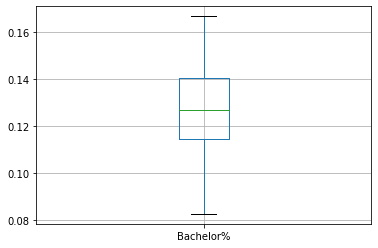

In [75]:
import matplotlib as plt
%matplotlib inline
df_2016_result[['Bachelor%']].boxplot()


In [77]:
prediction_2020 = pd.read_csv('predictions_2020 1.csv')

In [78]:
prediction_2020 = prediction_2020.drop(columns = 'State')

In [79]:
data_2020 = election_result_2020.merge(df_2020, on = 'CD_ID')

In [80]:
data_2020

,CD_ID,Clinton-2016,Trump-2016,Pop,Females,Median_Age,Veterans,White_People,Afr_Am_People,Asian,...,Working_Information,Median_Gross_Rent,District_Name,State_Id,CD,State_Full,State,Health_insurance_coverage,Turn_Out,Approval_Rate_Predecessor
0,AK-AL,37.6,52.8,737438,354486,34.9,67635,474555,25197,46381,...,7578,1177,Congressional District (at Large) (116th Congr...,02,AL,Alaska,AK,87.4,0.546228,39.366667
1,AL-01,34.1,63.5,715346,370803,40.3,51744,479949,196891,10627,...,4357,844,"Congressional District 1 (116th Congress), Ala...",01,01,Alabama,AL,87.7,0.472894,39.366667
2,AL-02,33,64.9,678122,351776,38.8,51625,426674,217977,7442,...,2638,778,"Congressional District 2 (116th Congress), Ala...",01,02,Alabama,AL,89.5,0.472894,39.366667
3,AL-03,32.3,65.3,708409,362468,39.2,51572,490987,183949,13049,...,4607,765,"Congressional District 3 (116th Congress), Ala...",01,03,Alabama,AL,90.7,0.472894,39.366667
4,AL-04,17.4,80.4,686297,349948,40.5,39104,591084,51171,3072,...,4427,657,"Congressional District 4 (116th Congress), Ala...",01,04,Alabama,AL,89.7,0.472894,39.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,WI-08,38.6,56.2,735997,368467,40.7,44746,662077,12052,15780,...,5770,775,"Congressional District 8 (116th Congress), Wis...",55,08,Wisconsin,WI,95.0,0.616779,39.366667
431,WV-01,26.4,68,606136,303304,41.8,42975,569483,16341,5765,...,3508,734,"Congressional District 1 (116th Congress), Wes...",54,01,West Virginia,WV,93.7,0.424938,39.366667
432,WV-02,29.4,65.8,624120,315504,42.7,47943,571744,28834,5377,...,3639,774,"Congressional District 2 (116th Congress), Wes...",54,02,West Virginia,WV,94.0,0.424938,39.366667
433,WV-03,23.3,72.5,575576,292367,44.0,35555,538546,23504,2317,...,3716,695,"Congressional District 3 (116th Congress), Wes...",54,03,West Virginia,WV,93.0,0.424938,39.366667


In [81]:
data_2020 = pd.merge(data_2020, prediction_2020, on = 'CD_ID')

In [82]:
data_2020[data_2020['State'] == 'CA']['Difference_predictions'].sum()

1557.6607715063756

In [83]:
data_2020[data_2020['State'] == 'CA']

,CD_ID,Clinton-2016,Trump-2016,Pop,Females,Median_Age,Veterans,White_People,Afr_Am_People,Asian,...,State_Id,CD,State_Full,State,Health_insurance_coverage,Turn_Out,Approval_Rate_Predecessor,Difference_predictions,Democrat_predictions,Republican_predictions
21,CA-01,36.5,56.2,711282,353645,42.8,50463,605294,12691,19443,...,06,01,California,CA,94.0,0.495903,39.366667,-23.075933,36.829595,59.890937
22,CA-02,69,23.3,722370,364994,44.4,38725,575564,11236,31398,...,06,02,California,CA,95.0,0.495903,39.366667,41.241603,69.272982,28.007282
23,CA-03,53,40.4,748104,377917,34.9,45129,512748,42954,87457,...,06,03,California,CA,93.8,0.495903,39.366667,8.868666,54.360924,45.460865
24,CA-04,39.3,54,754525,376917,44.1,55727,636599,10014,43292,...,06,04,California,CA,95.3,0.495903,39.366667,-8.861587,43.808385,52.668963
25,CA-05,69.2,24.3,730955,371842,40.7,35675,453797,47271,83384,...,06,05,California,CA,93.9,0.495903,39.366667,39.542322,69.108179,29.547299
26,CA-06,69.2,24.4,777985,397155,34.0,34249,386232,99593,128292,...,06,06,California,CA,94.1,0.495903,39.366667,38.125711,68.437290,30.278308
27,CA-07,52.3,40.9,753640,385097,38.9,44389,474784,55737,120343,...,06,07,California,CA,95.7,0.495903,39.366667,8.296978,53.596152,45.267815
28,CA-08,39.6,54.7,717107,355699,35.3,45978,535884,61955,23511,...,06,08,California,CA,92.2,0.495903,39.366667,-16.463086,41.941988,58.380010
29,CA-09,56.6,38,775148,394553,35.2,32892,439731,69964,116574,...,06,09,California,CA,94.3,0.495903,39.366667,17.451089,57.941946,40.486943
30,CA-10,48.5,45.5,761485,380953,35.0,32154,573461,24578,54882,...,06,10,California,CA,94.6,0.495903,39.366667,2.795267,50.916357,48.109239


In [84]:
def who_win_2020(state):  # The total votes of all CD in a state matters. Need to aggregate them all together
    
    data_2020['Vote_2020'] = data_2016['Vote_2020'].apply(lambda x: int(x))
    a = (data_2020[data_2020['State']== state]['Vote_2020'] * data_2020[data_2020['State']== state]['Republican_predictions']/100).sum()
    b = (data_2020[data_2020['State']== state]['Vote_2020'] * data_2020[data_2020['State']== state]['Democrat_predictions']/100).sum()
    if a > b:
        #print(a,b)
        return 'Trump'
    else:
        #print(a,b)
        return 'Democrat'
#data_2016['State'].apply(lambda x: who_win_2016(x))
who_win_2020('PA')
# (data_2016[data_2016['State']== 'PA']['Vote_2016'] * data_2016[data_2016['State']== 'PA']['Republican']/100).sum()

'Trump'

In [85]:
data_2020['Who_win'] = data_2020['State'].apply(lambda x: who_win_2020(x))

In [86]:
df_2020_result = pd.DataFrame((data_2020.groupby(['State','Who_win']).count().iloc[:,0]+2)) # add 2 because each state has two senator, and their votes go for the winner of the state by its people 
df_2020_result.index = df_2020_result.index.map('_'.join) # Multi Index to single index
df_2020_result = df_2020_result.rename(columns = {'CD_ID':'COUNT'}) # Count
df_2020_result['State_Who'] = df_2020_result.index # index to column
df_2020_result['State'] = df_2020_result['State_Who'].apply(lambda x: x.split('_')[0])
df_2020_result['Candidate'] = df_2020_result['State_Who'].apply(lambda x: x.split('_')[1]) # get the winner for the state

In [87]:
df_2020_result.groupby(['Candidate']).sum()

,COUNT
Candidate,
Democrat,203
Trump,332


In [88]:
df_2016_result.groupby(['Candidate']).sum()

,COUNT,Pop,Females,Median_Age,Veterans,White_People,Afr_Am_People,Asian,American_Ind_Alk_Ntv,Cuban_Origin,...,Health_insurance_coverage,2014,New_Count,Asian%,Unemployment%,Bachelor%,Native_US%,Mexican_Origin%,White%,Poor%
Candidate,,,,,,,,,,,,,,,,,,,,,
Clinton,230.0,139374582.0,70701038.0,781.6,7264575.0,95603769.0,14187014.0,12315049.0,954910.0,416228.0,...,1874.4,8.274,230,1.390477,0.077380,2.830319,16.951408,1.579442,14.745789,2.447599
Trump,305.0,181372011.0,92197426.0,1126.7,11539912.0,139067188.0,26189432.0,4932784.0,1640678.0,1686252.0,...,2726.6,11.767,-322,0.660172,0.141735,3.471154,27.808822,1.835163,23.767416,4.451827


In [89]:
def who_win_2020_diff(state):  # The total votes of all CD in a state matters. Need to aggregate them all together
    
    data_2020['Vote_2020'] = data_2016['Vote_2020'].apply(lambda x: int(x))
    a = (data_2020[data_2020['State']== state]['Vote_2020'] * data_2020[data_2020['State']== state]['Difference_predictions']/100).sum()
#     print(a)
    if a < 0:
        #print(a,b)
        return 'Trump'
    else:
        #print(a,b)
        return 'Democrat'
#data_2016['State'].apply(lambda x: who_win_2016(x))
who_win_2020_diff('PA')
# (data_2016[data_2016['State']== 'PA']['Vote_2016'] * data_2016[data_2016['State']== 'PA']['Republican']/100).sum()

'Trump'

In [90]:
data_2020['Who_win_diff'] = data_2020['State'].apply(lambda x: who_win_2020_diff(x))

In [91]:
df_2020_result2 = pd.DataFrame((data_2020.groupby(['State','Who_win_diff']).count().iloc[:,0]+2)) # add 2 because each state has two senator, and their votes go for the winner of the state by its people 
df_2020_result2.index = df_2020_result2.index.map('_'.join) # Multi Index to single index
df_2020_result2 = df_2020_result2.rename(columns = {'CD_ID':'COUNT'}) # Count
df_2020_result2['State_Who'] = df_2020_result2.index # index to column
df_2020_result2['State'] = df_2020_result2['State_Who'].apply(lambda x: x.split('_')[0])
df_2020_result2['Candidate'] = df_2020_result2['State_Who'].apply(lambda x: x.split('_')[1]) # get the winner for the state

In [92]:
# df_2020_result2

In [93]:
df_2020_result2.groupby(['Candidate']).sum()

,COUNT
Candidate,
Democrat,203
Trump,332


In [94]:
df_2020_result

,COUNT,State_Who,State,Candidate
AK_Trump,3,AK_Trump,AK,Trump
AL_Trump,9,AL_Trump,AL,Trump
AR_Trump,6,AR_Trump,AR,Trump
AZ_Trump,11,AZ_Trump,AZ,Trump
CA_Democrat,55,CA_Democrat,CA,Democrat
CO_Democrat,9,CO_Democrat,CO,Democrat
CT_Democrat,7,CT_Democrat,CT,Democrat
DE_Trump,3,DE_Trump,DE,Trump
FL_Trump,29,FL_Trump,FL,Trump
GA_Trump,16,GA_Trump,GA,Trump


In [95]:
def party_2020(state_who):
    can = df_2020_result[df_2020_result['State_Who'] == state_who]['Candidate']
    a = df_2020_result[df_2020_result['State_Who'] == state_who]['COUNT']
    if int(a) == 38:
        return -55    
    elif can.values == 'Trump':
        return int(-a)
    else:
        return int(a)

In [96]:
df_2020_result['New_Count'] = df_2020_result['State_Who'].apply(lambda x: party_2020(x))

In [97]:
# Total ticket distribution - the importance of state and the final result for 2016 election
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2020_result,
             columns=[ 'State','New_Count'],
             key_on='feature.properties.id',
             fill_color='RdYlBu', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Distribution of tickets')
m

/usr/local/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [98]:
# Total ticket distribution - the importance of state and the final result for 2016 election
import folium
m = folium.Map(location=[40.8075,-93.9626],zoom_start=4)
m.choropleth(geo_data='map.geojson', data=df_2016_result,
             columns=[ 'State','New_Count'],
             key_on='feature.properties.id',
             fill_color='RdYlBu', fill_opacity=0.6, line_opacity=0.8,
             legend_name='Distribution of tickets')
m

## FROM HERE we are going to do the modeling and jump to Another notebook